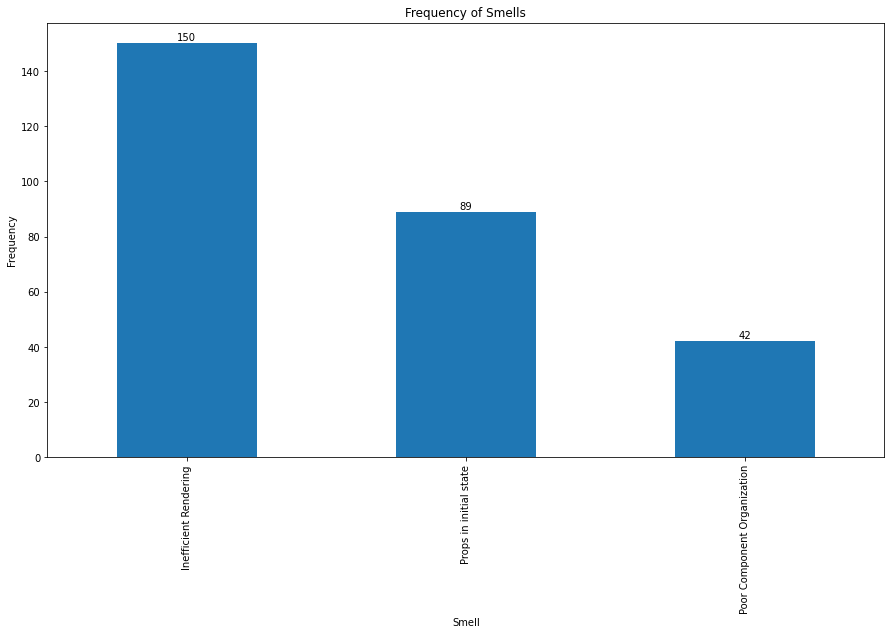

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\Owner\Desktop\sample_smells_dataset.csv"
df = pd.read_csv(file_path)

#Checking the Frequency of each present Smell

smell_counts = df["Smell"].value_counts()

# Plot the bar chart
plt.figure(figsize=(15, 8))
ax = smell_counts.plot(kind="bar")

plt.xlabel("Smell")
plt.ylabel("Frequency")
plt.title("Frequency of Smells")

# Display the number of each smell
for i, count in enumerate(smell_counts):
    ax.text(i, count + 1, str(count), ha="center", color="black")

plt.show()

In [72]:
import os

folder_path = "~/Desktop/DatasetFiles"  # Replace with the actual path to the folder

# Get the absolute path of the folder
folder_path = os.path.expanduser(folder_path)
folder_path = os.path.abspath(folder_path)

# Initialize counters and empty file list
total_files = 0
empty_files = 0
empty_file_list = []

# Iterate through the files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith((".js",".tsx",".jsx")):
        file_path = os.path.join(folder_path, file_name)

        # Check if the file is empty
        if os.path.getsize(file_path) == 0:
            empty_files += 1
            empty_file_list.append(file_name)
        
        total_files += 1

# Print the results
print(f"Total number of files: {total_files}")
print(f"Total number of empty files: {empty_files}")

if empty_files > 0:
    print("Empty files:")
    for empty_file in empty_file_list:
        print(empty_file)


Total number of files: 281
Total number of empty files: 0


In [75]:
#Output Code Snippet

import pandas as pd

# Read the CSV file
file_path = r"C:\Users\Owner\Desktop\sample_smells_dataset.csv"
df = pd.read_csv(file_path)

# Ask the user for the row number
row_number = int(input("Enter the Row Number: "))

# Check if the row number is valid
if row_number >= 1 and row_number <= len(df):
    # Get the path from the 'FPath' column for the specified row
    fpath = df.loc[row_number - 1, 'FPath']

    # Read the code from the file
    with open(fpath, "r") as file:
        code_lines = file.readlines()

    # Print the code
    print("".join(code_lines))
else:
    print("Invalid row number.")


Enter the Row Number: 280
export class ThresholdsEditor extends PureComponent<Props, State> {
  private latestThresholdInputRef: React.RefObject<HTMLInputElement>;

  constructor(props: Props) {
    super(props);

    const steps = toThresholdsWithKey(props.thresholds!.steps);
    steps[0].value = -Infinity;

    this.state = { steps };
    this.latestThresholdInputRef = React.createRef();
  }

  onAddThreshold = () => {
    const { steps } = this.state;

    let nextValue = 0;

    if (steps.length > 1) {
      nextValue = steps[steps.length - 1].value + 10;
    }

    let color = colors.filter((c) => !steps.some((t) => t.color === c))[1];
    if (!color) {
      // Default color when all colors are used
      color = '#CCCCCC';
    }

    const add = {
      value: nextValue,
      color: color,
      key: counter++,
    };

    const newThresholds = [...steps, add];
    sortThresholds(newThresholds);

    this.setState({ steps: newThresholds }, () => {
      if (this.latestThreshold